In [1]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-21ubuntu1) ...
Setting up fonts-ipafont-mincho (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/ipam.ttf to provide /usr/share/fonts/truetype/fonts-japanese-mincho.ttf (fonts-japanese-mincho.ttf) in auto mode
Setting up fonts-ipafont-gothic (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-gothic/ipag.

Text(0.5, 1.0, '日本語を表示できるかテスト')

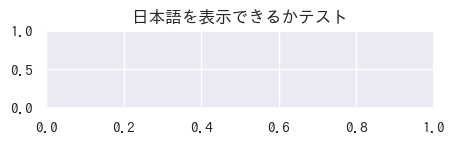

In [2]:
!apt-get update -qq
!apt-get install fonts-ipafont-gothic -qq

import matplotlib.pyplot as plt
from matplotlib import font_manager

# インストールしたフォントのパスを取得
font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

# フォントを Matplotlib に追加
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'IPAGothic'

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')

# 動作確認
plt.figure(figsize=(5,1))
plt.title('日本語を表示できるかテスト')

In [3]:
# Googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Excelファイルのパスを指定
file_path = '/content/drive/MyDrive/分析対象データ'

# Excelファイルを読み込み、データフレームに格納
df = pd.read_excel(file_path + "/能力評価とCUBIC総合評価.xlsx")
df_cubic = pd.read_excel(file_path + "/cubicと人事評価.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   社員コード        687 non-null    int64 
 1   2022.9期能力評価  687 non-null    object
 2   2021.9期能力評価  687 non-null    object
 3   2020.9期能力評価  687 non-null    object
 4   CUBIC総合評価    572 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.0+ KB


In [6]:
# '－'を含む行を削除
df = df[df['2022.9期能力評価'] != '－']

In [7]:
df["2022.9期能力評価"].unique()

array(['B', 'A', 'C'], dtype=object)

In [8]:
df["CUBIC総合評価"].unique()

array(['A', nan, 'B-', 'C', 'B', 'D', 'S'], dtype=object)

In [9]:
#要らないカラムを除去
df = df.drop(columns=['2020.9期能力評価', '2021.9期能力評価'])

In [10]:
# 評価基準の変換辞書
cubic_dict = {
    'S': 6,
    'A': 5,
    'B': 4,
    'B-': 3,
    'C': 2,
    'D':1,
    '－': 0
}

# CUBIC総合評価カラムの変換
df['CUBIC総合評価'] = df['CUBIC総合評価'].map(cubic_dict)

In [11]:
# 抜き出したいカラムのリストを定義
columns_to_extract = [
    '社員コード', '思索型:内閉性', '自制型:弱気さ', '従順性', 'ﾓﾗﾄﾘｱﾑ傾向',
    '自己信頼性', '努力型:持続性', '積極性', '協調性', '共感性', "努力型:規則性"
]

# 新しいデータフレームを作成
df_reduced = df_cubic[columns_to_extract]

In [12]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   社員コード     545 non-null    int64
 1   思索型:内閉性   545 non-null    int64
 2   自制型:弱気さ   545 non-null    int64
 3   従順性       545 non-null    int64
 4   ﾓﾗﾄﾘｱﾑ傾向  545 non-null    int64
 5   自己信頼性     545 non-null    int64
 6   努力型:持続性   545 non-null    int64
 7   積極性       545 non-null    int64
 8   協調性       545 non-null    int64
 9   共感性       545 non-null    int64
 10  努力型:規則性   545 non-null    int64
dtypes: int64(11)
memory usage: 47.0 KB


In [13]:
# 社員コードを基に結合
df_reduced = pd.merge(df, df_reduced[['社員コード', '思索型:内閉性', '自制型:弱気さ', '従順性', 'ﾓﾗﾄﾘｱﾑ傾向',
    '自己信頼性', '努力型:持続性', '積極性', '協調性', '共感性', "努力型:規則性"]], on='社員コード', how='left')

In [14]:
df_reduced = df_reduced.dropna(axis=0, how='any')

#要らないカラムを除去
df_reduced = df_reduced.drop(columns=['社員コード'])

In [15]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 623
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2022.9期能力評価  466 non-null    object 
 1   CUBIC総合評価    466 non-null    float64
 2   思索型:内閉性      466 non-null    float64
 3   自制型:弱気さ      466 non-null    float64
 4   従順性          466 non-null    float64
 5   ﾓﾗﾄﾘｱﾑ傾向     466 non-null    float64
 6   自己信頼性        466 non-null    float64
 7   努力型:持続性      466 non-null    float64
 8   積極性          466 non-null    float64
 9   協調性          466 non-null    float64
 10  共感性          466 non-null    float64
 11  努力型:規則性      466 non-null    float64
dtypes: float64(11), object(1)
memory usage: 47.3+ KB


In [16]:
df_reduced.head(10)

,2022.9期能力評価,CUBIC総合評価,思索型:内閉性,自制型:弱気さ,従順性,ﾓﾗﾄﾘｱﾑ傾向,自己信頼性,努力型:持続性,積極性,協調性,共感性,努力型:規則性
0,B,5.0,51.0,42.0,52.0,44.0,56.0,59.0,57.0,52.0,47.0,51.0
2,A,3.0,51.0,46.0,26.0,65.0,70.0,26.0,71.0,48.0,47.0,19.0
3,B,2.0,71.0,59.0,46.0,51.0,31.0,42.0,43.0,44.0,36.0,44.0
4,B,4.0,65.0,42.0,58.0,41.0,50.0,53.0,44.0,40.0,40.0,55.0
6,B,5.0,48.0,33.0,46.0,36.0,59.0,33.0,50.0,52.0,40.0,32.0
8,B,5.0,51.0,42.0,46.0,36.0,53.0,48.0,55.0,48.0,36.0,36.0
9,A,5.0,45.0,59.0,46.0,51.0,53.0,50.0,57.0,56.0,52.0,44.0
10,B,3.0,65.0,51.0,39.0,57.0,44.0,48.0,50.0,52.0,50.0,44.0
11,B,5.0,54.0,37.0,50.0,47.0,70.0,50.0,49.0,40.0,36.0,55.0
12,B,3.0,65.0,51.0,50.0,47.0,47.0,50.0,46.0,35.0,32.0,51.0


In [65]:
df_reduced["2022.9期能力評価"].value_counts()

,count
2022.9期能力評価,
B,336
A,122
C,8


# 決定木モデルの作成

In [17]:
!pip install graphviz
!pip install pydotplus
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [68]:
# 特徴量とターゲットに分ける
X = df_reduced.drop('2022.9期能力評価', axis=1)
y = df_reduced['2022.9期能力評価']

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# パラメータグリッドの設定（範囲拡大）
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 4, 5, 6],  # 深さの範囲を拡大
    'min_samples_split': [2, 4, 6, 8, 10, 12],  # 最小分割サンプル数を増加
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],  # 最小葉サンプル数の範囲を拡大
    'max_features': [None, 'sqrt', 'log2'],  # 'auto' を削除
    'class_weight': [None, 'balanced', {'A': 1, 'B': 2, 'C': 1}],  # クラスラベルに合わせて修正
    'min_impurity_decrease': [0.0, 0.01, 0.03],  # ノード分割の最小不純度減少
}

# モデルのインスタンス化
model = DecisionTreeClassifier()

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータの表示
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 38880 candidates, totalling 194400 fits


KeyboardInterrupt: 

In [232]:
# 最適なパラメータでモデルの作成
#best_model = grid_search.best_estimator_

# 手動で最適なパラメータを設定
best_model = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=5,
    max_features='sqrt',
    min_impurity_decrease=0.0,
    min_samples_leaf=6,
    min_samples_split=12,
    splitter='random'
)


# トレーニングデータに対するモデルの適合
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=12, splitter='random')

In [233]:
target_label = 'A'  # 目標とするラベル
desired_count = 20  # 目標とする「A」と予測された数
current_count = 1  # 現在の「A」と予測された数

while current_count < desired_count:
    # トレーニングデータに対するモデルの適合
    best_model.fit(X_train, y_train)

    # 予測を行う
    predictions = best_model.predict(X_train)

    # Aと予測された数をカウントする
    current_count = np.sum(predictions == target_label)

    print(f"Current count of '{target_label}' predictions: {current_count}")

print("Training complete. Desired count reached.")

Current count of 'A' predictions: 6
Current count of 'A' predictions: 7
Current count of 'A' predictions: 48
Training complete. Desired count reached.


In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 予測
y_pred = best_model.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7357142857142858
Precision: 0.7070807453416149
Recall: 0.7357142857142858
F1 Score: 0.7102718877366765


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
print(f'Test data sample size: {len(y_test)}')

Test data sample size: 140


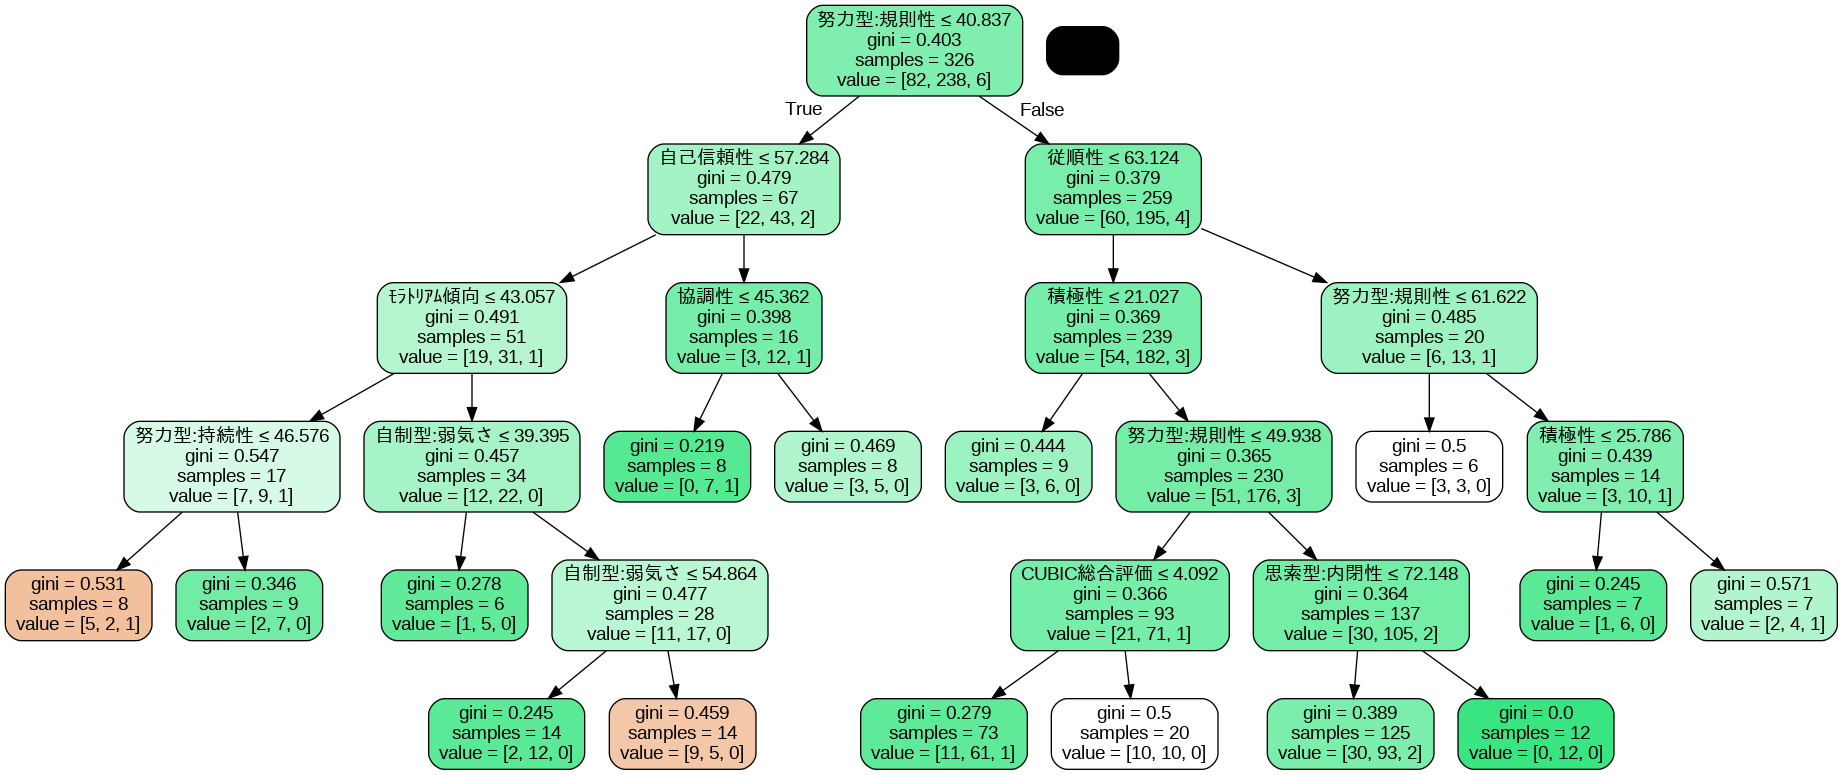

In [236]:
# 決定木をエクスポート
dot_data = export_graphviz(
    best_model,  # グリッドサーチ後の最適なモデルを使用
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# グラフを生成
graph = pydotplus.graph_from_dot_data(dot_data)

# グラフを表示
Image(graph.create_png())

In [237]:
# 学習済みのモデルからクラスの順番を取得
class_labels = best_model.classes_

# クラスの順番を表示
print("Class order:", class_labels)

Class order: ['A' 'B' 'C']


**混同行列を用いた評価**

In [238]:
np.unique(y_test)

array(['A', 'B', 'C'], dtype=object)

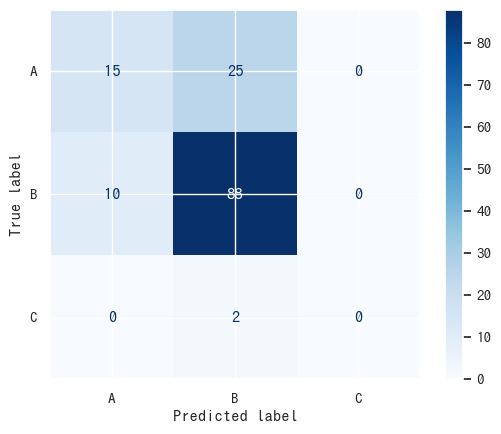

In [239]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混同行列の計算
cm = confusion_matrix(y_test, y_pred)

# ラベルを明示的に指定
labels = sorted(set(y_test))  # テストデータのラベルを元にクラスラベルを取得

# 混同行列の表示
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

# 表示
import matplotlib.pyplot as plt
plt.show()

In [240]:
# トレーニングデータに対する予測
y_train_pred = best_model.predict(X_train)

# テストデータに対する予測
y_test_pred = best_model.predict(X_test)

# トレーニングデータの評価
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# テストデータの評価
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# 評価結果の出力
print("Training Data Evaluation")
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')

print("\nTest Data Evaluation")
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')

# 過学習の確認
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.05:
    print("\nWarning: The model may be overfitting.")
else:
    print("\nThe model does not appear to be overfitting.")

Training Data Evaluation
Accuracy: 0.7515337423312883
Precision: 0.7139818819790793
Recall: 0.7515337423312883
F1 Score: 0.7213567903537942

Test Data Evaluation
Accuracy: 0.7357142857142858
Precision: 0.7070807453416149
Recall: 0.7357142857142858
F1 Score: 0.7102718877366765

The model does not appear to be overfitting.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
